<a href="https://colab.research.google.com/github/ivonnics/Machine-Learning/blob/master/Adult_income_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomado de: https://medium.com/@julie.yin/use-one-hot-encoding-to-analyze-adult-income-data-and-some-bad-news-for-the-single-people-in-the-cef71f9d47b4

y de: https://github.com/janeyin600/Machine_learning_projects/tree/master/adult_income_predictions

### Use logistic regression to predict adult incomes
### Data resource: Kaggle (https://www.kaggle.com/flyingwombat/logistic-regression-with-uci-adult-income/data)

In [0]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Load local csv data into pandas DataFrame
income_df = pd.read_csv("https://raw.githubusercontent.com/janeyin600/Machine_learning_projects/master/adult_income_predictions/data/income_data.csv")
#income_df_list =  list(income_df)
print list(income_df)
print income_df.shape

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
(48842, 15)


In [3]:
income_df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32613,28,Private,334032,Assoc-voc,11,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
27706,17,Private,226717,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K
18595,40,Private,29841,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
24334,29,?,189282,HS-grad,9,Married-civ-spouse,?,Not-in-family,White,Female,0,0,27,United-States,<=50K
33346,22,Private,270436,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K


In [4]:
# get some basic ideas about the data
def summerize_data(df):
    for column in df.columns:
        print column
        if df.dtypes[column] == np.object: # Categorical data
            print df[column].value_counts()
        else:
            print df[column].describe() 
            
        print '\n'
    
summerize_data(income_df) 

age
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


fnlwgt
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6t

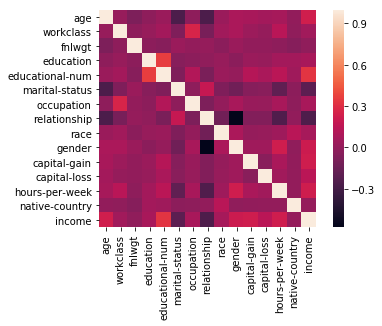

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
48841,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [5]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(income_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

In [6]:
# Expore the strong correaltion between "education" and "education-num" revealed by the heatmap
income_df[["education", "educational-num"]].head(10)

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


In [0]:
# "education" and "education-num" are essentially the same data, delete the numerical one
del income_df["educational-num"]

In [8]:
income_df.head(1) # Successfully deleted!

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [9]:
# Check the negative correlation between "gender" and "relationship"
income_df[["gender", "relationship"]].head(10)

,gender,relationship
0,Male,Own-child
1,Male,Husband
2,Male,Husband
3,Male,Husband
4,Female,Own-child
5,Male,Not-in-family
6,Male,Unmarried
7,Male,Husband
8,Female,Unmarried
9,Male,Husband


In [0]:
# It looks like "Female" and "wife" and anti-correlated, so are "Male" and "Husband"

In [0]:
encoded_data, encoders = number_encode_features(income_df)
new_series = encoded_data["income"]

In [12]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(encoded_data[encoded_data.columns.drop("income")], new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [13]:
# logistic regression
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
print accuracy_score(y_test, y_pred)

0.8061830341909506


In [0]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [16]:
print fit_and_evaluate(cls)

0.19381696580904934


In [0]:
# Try random forest method
random_forest = RandomForestRegressor(random_state=60)

In [18]:
print fit_and_evaluate(random_forest)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.18870310971587165


Index([u'age', u'workclass', u'fnlwgt', u'education', u'marital-status',
       u'occupation', u'relationship', u'race', u'gender', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country'],
      dtype='object')


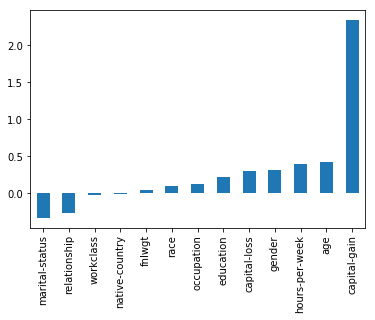

capital-gain      2.337466
age               0.422483
hours-per-week    0.393855
gender            0.314647
capital-loss      0.297247
education         0.220595
occupation        0.125024
race              0.106850
fnlwgt            0.042094
native-country   -0.007469
workclass        -0.026643
relationship     -0.261370
marital-status   -0.329458
dtype: float64


In [19]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print X_train.columns
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print coefs.sort_values(ascending = False)

In [20]:
# Try one hot encoding

# Copy the original data
features = income_df.copy()

# Select the numeric columns
numeric_subset = income_df.select_dtypes('number')
categorical_subset = income_df.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("income")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print features.head()

   age  fnlwgt  ...  native-country_Vietnam  native-country_Yugoslavia
0   25  226802  ...                       0                          0
1   38   89814  ...                       0                          0
2   28  336951  ...                       0                          0
3   44  160323  ...                       0                          0
4   18  103497  ...                       0                          0

[5 rows x 107 columns]


In [21]:
# Replace the inf with nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
features = features.dropna()

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(features, new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print accuracy_score(y_test, y_pred)

0.8515662321708866


In [23]:
print fit_and_evaluate(cls)

0.1484337678291135


In [24]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print coefs.sort_values(ascending = False)

capital-gain                            2.257300
marital-status_Married-civ-spouse       0.815612
hours-per-week                          0.365734
age                                     0.354989
education_Bachelors                     0.297064
education_Masters                       0.258185
capital-loss                            0.254065
occupation_Exec-managerial              0.239866
education_Prof-school                   0.228063
education_Doctorate                     0.204823
relationship_Wife                       0.202591
relationship_Not-in-family              0.185503
gender_Male                             0.169968
occupation_Prof-specialty               0.162656
workclass_Federal-gov                   0.111335
occupation_Tech-support                 0.099157
occupation_Sales                        0.075585
native-country_United-States            0.069986
fnlwgt                                  0.066373
relationship_Unmarried                  0.062707
workclass_Private   

In [0]:
# Further group numerical predictors such as "age" or "hours-per-week" to gain more insight!
# Group the "age" column
age_group = []
for age in income_df["age"]:
    if age < 25:
        age_group.append("<25")
    elif 25 <= age <= 34:
        age_group.append("25-34")
    elif 34 < age <= 44:
        age_group.append("35-44")
    elif 44 < age <= 54:
        age_group.append("45-54")
    elif 54 < age <= 65:
        age_group.append("55-64")
    else:
        age_group.append("65 and over")

In [26]:
new_income_df = income_df.copy()
new_income_df["age_group"] = age_group
del new_income_df["age"]

# Same thing for "hours-per-week"
work_hours_per_week = []
for hours in income_df["hours-per-week"]:
    if hours < 16:
        work_hours_per_week.append("<16")
    elif 16 <= hours <= 32:
        work_hours_per_week.append("16-32")
    elif 32 < hours <= 48:
        work_hours_per_week.append("32-48")
    elif 48 < hours <= 60:
        work_hours_per_week.append("48-60")
    else:
        work_hours_per_week.append("60 and over")
        
new_income_df["work_hours_per_week"] = work_hours_per_week
del new_income_df["hours-per-week"]

new_income_df.head(1)

,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income,age_group,work_hours_per_week
0,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,<=50K,25-34,32-48


In [27]:
# Apply one-hot-encoding to the new dataframe

# Select the numeric columns
numeric_subset = new_income_df.select_dtypes('number')
categorical_subset = new_income_df.select_dtypes('object')

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("income")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print features.head()

   fnlwgt  ...  work_hours_per_week_<16
0  226802  ...                        0
1   89814  ...                        0
2  336951  ...                        0
3  160323  ...                        0
4  103497  ...                        0

[5 rows x 116 columns]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
cls.fit(X_train, y_train)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print coefs.sort_values(ascending = False)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


capital-gain                         2.519133
marital-status_Married-civ-spouse    0.796968
age_group_45-54                      0.300470
education_Bachelors                  0.275053
capital-loss                         0.273113
education_Masters                    0.248869
occupation_Exec-managerial           0.225236
age_group_35-44                      0.212111
work_hours_per_week_48-60            0.211735
education_Prof-school                0.208797
education_Doctorate                  0.184649
relationship_Wife                    0.184177
relationship_Not-in-family           0.180770
occupation_Prof-specialty            0.161622
age_group_55-64                      0.157533
gender_Male                          0.156160
occupation_Tech-support              0.097081
fnlwgt                               0.087129
occupation_Sales                     0.083978
occupation_Protective-serv           0.082415
workclass_Federal-gov                0.080784
work_hours_per_week_60 and over   

In [0]:
# Follow-up work: optimize the hyperparameters of random forest model
